In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

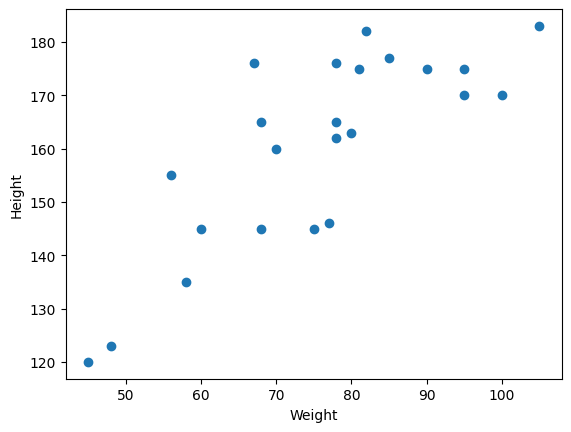

In [5]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
df.corr()       #how much one quantity changes when other changes (-1 to 1)

,Weight,Height
Weight,1.000000,0.796877
Height,0.796877,1.000000


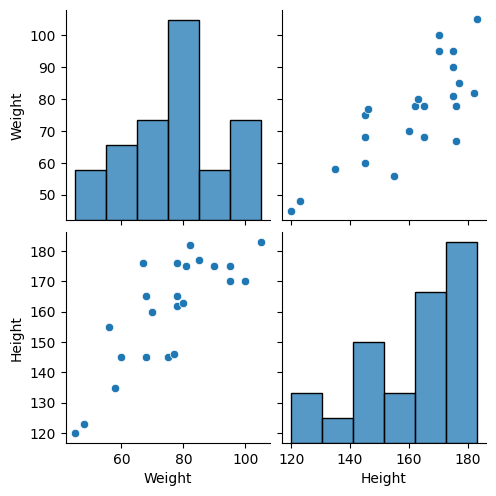

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
# Independent and Dependent features
X = df[['Weight']]  # Independent should be dataframe or 2D array
y = df['Height']    # This variable can be in series or 1D array

In [9]:
np.array(X).shape

(23, 1)

In [10]:
np.array(y).shape

(23,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [28]:
X_train.shape

(17, 1)

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.23959206],
       [ 0.23959206],
       [-2.160607  ],
       [ 1.47605824],
       [-0.48774099],
       [ 2.20339129]])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
print('Coefficient or slope:',regression.coef_)
print('Intercept :', regression.intercept_)

Coefficient or slope: [12.40643942]
Intercept : 159.35294117647058


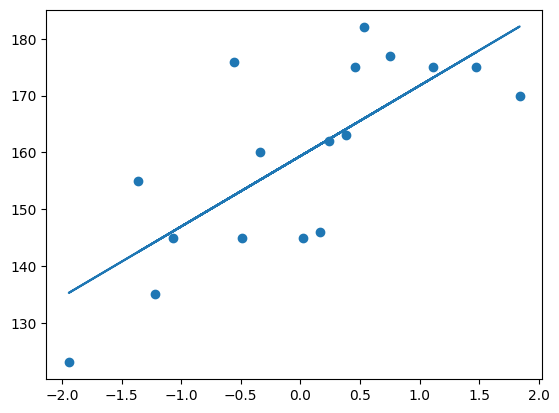

In [21]:
#Plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [22]:
# Prediction of test data
# 1. predicted height output = intercept + coef_(Weights)
# 2. y_pred_test = 159 + 12.40(X_test)

In [23]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [24]:
#Performance metrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

93.46762046870539
8.658264689730908
9.667865352222558


In [26]:
# R-square
# Formula
# R^2 = 1-SSR/SST
# R^2 = Coefficient of determination SSR = sum of squares of residuals SST = Total sum of squares

In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7733965696765174


Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n:The number of observations K:The number of predictor variables

In [29]:
#display adjusted R squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7167457120956467

In [31]:
%pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.8 MB 2.5 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.8 MB 2.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 3.0 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 3.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.6 MB/s eta 0:00:02
   ----------------------------- ---------- 7.3/9.8 MB 3.9 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
## OLS Linear Regression
import statsmodels.api as sm 

In [33]:
model = sm.OLS(y_train,X_train).fit()

In [37]:
prediction = model.predict(X_train)
print(prediction)

[-15.07474238  22.82443389   2.97248441 -24.09835578  18.31262719
  -6.05112899 -13.2700197   -4.24640631   5.67956843   0.26540039
   2.07012307  -6.95349033  13.80082049   6.58192977   9.28901379
 -16.87946506   4.77720709]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.056
Method:                 Least Squares   F-statistic:                            0.09652
Date:                Tue, 28 Jan 2025   Prob (F-statistic):                       0.760
Time:                        12:20:24   Log-Likelihood:                         -110.37
No. Observations:                  17   AIC:                                      222.7
Df Residuals:                      16   BIC:                                      223.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [44]:
#prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.91125755])